1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


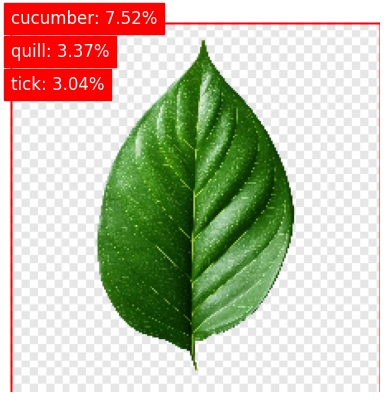

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the MobileNetV2 model pre-trained on ImageNet dataset
model = MobileNetV2(weights='imagenet')

def load_and_preprocess_image(img_path):
    """Load and preprocess an image."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array), img

def predict_image(img_path):
    """Predict the class of the image and return predictions along with the processed image."""
    processed_image, original_image = load_and_preprocess_image(img_path)
    predictions = model.predict(processed_image)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    return decoded_predictions, original_image

def display_image_with_predictions(img_path):
    predictions, img = predict_image(img_path)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    
    # Create a rectangle patch for each prediction
    ax = plt.gca()
    for i, (imagenet_id, label, score) in enumerate(predictions):
        # Create a rectangle around the edge of the image
        rect = patches.Rectangle((0, 0), 224, 224, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(0, 0 + i*20, f"{label}: {score * 100:.2f}%", color='white', backgroundcolor='red', fontsize=12)
    
    plt.show()

# Example usage
img_path = 'leaf1.jpg'  # Replace with your image path
display_image_with_predictions(img_path)


helloworld
